# Formular la pregunta

### "Cuál es la probabilidad que un tweet que origina dentro de los coordinados geográficos (-78.31, 0.44, -70.71, 11.39) contiene al menos una ocurrencia de la palabra 'yo' con cualquier composición de acentos y letras minúsculas y mayúsculas."

![](http://mediossociales.es/wp-content/uploads/2012/01/twitter_futbol12.jpg)

# Recopilar datos

In [36]:
import os

import tweepy
from tweepy import Stream

from stream_listener import FiniteStreamListener
from __future__ import unicode_literals

### Cargar credenciales

In [15]:
CONSUMER_KEY = '##########'
CONSUMER_SECRET = '###########'
ACCESS_TOKEN = '##############'
ACCESS_TOKEN_SECRET = '##########'

In [38]:
COLOMBIA_GEO_LOCATION_BOUNDING_BOX = [-78.31, 0.44, -70.71, 11.39]
NUMBER_OF_TWEETS = 100

In [39]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

### Establecer una conexión al API de Twitter

In [40]:
finite_stream_listener = FiniteStreamListener(number_of_tweets=NUMBER_OF_TWEETS)
streaming_api = Stream(auth=auth, listener=finite_stream_listener)

### Sorber del firehouse

In [41]:
streaming_api.filter(locations=COLOMBIA_GEO_LOCATION_BOUNDING_BOX)

# Limpiar datos

In [42]:
from unidecode import unidecode

### Definir funciones de limpieza

In [43]:
def make_lowercase(tweet):
    return tweet.lower()


def remove_diacritics(tweet):
    return unidecode(tweet)


def remove_non_alpha_characters(tweet):
    return ''.join(character for character in tweet if character.isalpha() or character == ' ')

### Aplicar las funciones

In [44]:
finite_stream_listener.tweets

['Yo pensé que no podría vivir sin @Uber_Col y vean que sí.',
 '@birnajulissatv @TReporta No entiendo que significa ese pacto?',
 '@camilobog1 Yo bb',
 '@alexand69424042 Muy buenas; esperando estes muy bien.',
 'Si alguna vez se te ha mojado un libro, vas a entender de lo que hablo. \nCuando eso pasa, y lo pones a secar, se de… https://t.co/ivg9O6KfcX',
 'estado debiles tiempo atrás. Y yo creo que pasa lo mismo con las personas cuando estamos heridxs. Tomamos nuestro t… https://t.co/yJ248Ay0Tk',
 '@TaxisLibres4 @elpaiscali @TraficoCali @TwiterosCali @CaliWebCo @Area20Apoyo @vivalasnoticias @CaliSosVos… https://t.co/pyOdzjOMru',
 '@CholoValderrama Vamos criollo saque el pecho por nosotros',
 '[BOLETÍN] #FeriaHechoAMano promueve desarrollo productivo en Azuay, Cañar y Morona Santiago. ➡️… https://t.co/gnjr33J82A',
 'No la soporto 🙄',
 'Yo si lo he hecho😌 https://t.co/d0xAnmcLtZ',
 'amigos colombianos no se equivoquen al votar @petrogustavo quiere llevar a colombia como cuba y venezuela n

In [46]:
cleaned_tweets = list(finite_stream_listener.tweets)

for cleaning_function in [make_lowercase, remove_diacritics, remove_non_alpha_characters]:
    cleaned_tweets = [cleaning_function(tweet) for tweet in cleaned_tweets]

In [47]:
cleaned_tweets

['yo pense que no podria vivir sin ubercol y vean que si',
 'birnajulissatv treporta no entiendo que significa ese pacto',
 'camilobog yo bb',
 'alexand muy buenas esperando estes muy bien',
 'si alguna vez se te ha mojado un libro vas a entender de lo que hablo cuando eso pasa y lo pones a secar se de httpstcoivgokfcx',
 'estado debiles tiempo atras y yo creo que pasa lo mismo con las personas cuando estamos heridxs tomamos nuestro t httpstcoyjaytk',
 'taxislibres elpaiscali traficocali twiteroscali caliwebco areaapoyo vivalasnoticias calisosvos httpstcopyodzjomru',
 'cholovalderrama vamos criollo saque el pecho por nosotros',
 'boletin feriahechoamano promueve desarrollo productivo en azuay canar y morona santiago  httpstcognjrja',
 'no la soporto ',
 'yo si lo he hecho httpstcodxanmcltz',
 'amigos colombianos no se equivoquen al votar petrogustavo quiere llevar a colombia como cuba y venezuela no permit httpstcomerjfxqds',
 'moms bday   nemo by harry sasson in bogota dc httpstcozmeh

# Dormir con tus datos

In [48]:
%matplotlib inline

from pprint import pprint
import pandas as pd

In [66]:
KEYWORD = 'yo'

### Primeros 10 tweets

In [67]:
pprint(cleaned_tweets[:10])

['yo pense que no podria vivir sin ubercol y vean que si',
 'birnajulissatv treporta no entiendo que significa ese pacto',
 'camilobog yo bb',
 'alexand muy buenas esperando estes muy bien',
 'si alguna vez se te ha mojado un libro vas a entender de lo que hablo cuando '
 'eso pasa y lo pones a secar se de httpstcoivgokfcx',
 'estado debiles tiempo atras y yo creo que pasa lo mismo con las personas '
 'cuando estamos heridxs tomamos nuestro t httpstcoyjaytk',
 'taxislibres elpaiscali traficocali twiteroscali caliwebco areaapoyo '
 'vivalasnoticias calisosvos httpstcopyodzjomru',
 'cholovalderrama vamos criollo saque el pecho por nosotros',
 'boletin feriahechoamano promueve desarrollo productivo en azuay canar y '
 'morona santiago  httpstcognjrja',
 'no la soporto ']


### ¿Cuantas veces aparece la palabra clave?

In [68]:
number_of_occurences = sum(KEYWORD in tweet for tweet in cleaned_tweets)
print('Nuestra palabra clave aparece: {} veces'.format(number_of_occurences))

Nuestra palabra clave aparece: 15 veces


### ¿Con cual frecuencia apareció?

In [69]:
print('Nuestra palabra clave apareció en: {}% de los tweets'.format(100 * number_of_occurences/NUMBER_OF_TWEETS))

Nuestra palabra clave apareció en: 15.0% de los tweets


### ¿Cómo son los tweets que la contienen?

In [70]:
pprint([tweet for tweet in cleaned_tweets if KEYWORD in tweet])

['yo pense que no podria vivir sin ubercol y vean que si',
 'camilobog yo bb',
 'estado debiles tiempo atras y yo creo que pasa lo mismo con las personas '
 'cuando estamos heridxs tomamos nuestro t httpstcoyjaytk',
 'taxislibres elpaiscali traficocali twiteroscali caliwebco areaapoyo '
 'vivalasnoticias calisosvos httpstcopyodzjomru',
 'yo si lo he hecho httpstcodxanmcltz',
 'darkarttphoto yo creo que querian decir cuando termine su mandato no '
 'negacion lo van a agradecer',
 'btsinpanama niikishallows paosuth littlesaravoo yaquelbella yo quiero a '
 'btstwt btsbighit en pty httpstcoustxyf',
 'ggfrostex bet baby date is cancelled im all yours',
 'camilobog que rico ese trozo para que me agas su yo bb',
 'gracias a la guardia kankuama fuerza fuerzagracias a los jovenes que fueron '
 'mayoriagracias al pueblo arhua httpstcovihwnifoq',
 'nicolasmaduro maduroen maduropt imvillarroel omarprietogob esperamos su '
 'respuesta y apoyo por la realizacion httpstcovpoyegzlzq',
 'nicolasmaduro 

### ¿Cuál es la distancia promedio entre ocurrencias consecutivas?

In [72]:
indices_of_tweets_containing_keyword = [index for index, tweet in enumerate(cleaned_tweets) if KEYWORD in tweet]

In [73]:
indices_of_tweets_containing_keyword

[0, 2, 5, 6, 10, 21, 32, 42, 65, 71, 76, 77, 86, 93, 97]

In [75]:
distances_between_indices_of_tweets_containing_keyword = [
    second_index - first_index for first_index, second_index in \
        zip(indices_of_tweets_containing_keyword[:-1], indices_of_tweets_containing_keyword[1:])
]

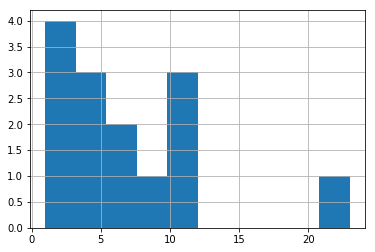

In [76]:
pd.Series(distances_between_indices_of_tweets_containing_keyword).hist()

# Construir un modelo

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta as beta_distribution

### Definir los parámetros de un Beta Distribution

In [79]:
alpha = 1 + number_of_occurences
beta = 1 + (NUMBER_OF_TWEETS - number_of_occurences)

x_values = np.linspace(0, 1, 1002)[1:-1]
pdf_y_values = beta_distribution(alpha, beta).pdf(x_values)
cdf_y_values = np.cumsum(pdf_y_values) / np.sum(pdf_y_values)

### Visualizar

![](http://i.imgur.com/mj059cS.png)

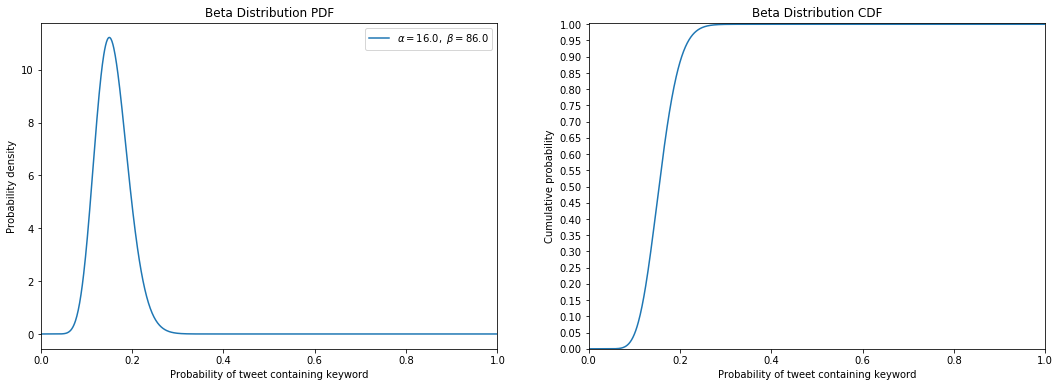

In [80]:
plt.figure(figsize=(18, 6))

# PDF
plt.subplot(121)

plt.plot(x_values, pdf_y_values, label=(r'$\alpha=%.1f,\ \beta=%.1f$' % (alpha, beta)))

plt.xlim(0, 1)
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Probability density')
plt.title('Beta Distribution PDF')
plt.legend(loc=1)


# CDF
plt.subplot(122)

plt.plot(x_values, cdf_y_values)

plt.xlim(0, 1)
plt.ylim(0, 1.005)
plt.yticks(np.linspace(0, 1, 21))
plt.xlabel('Probability of tweet containing keyword')
plt.ylabel('Cumulative probability')
plt.title('Beta Distribution CDF')

plt.show()

# Comunicar resultados

### Con 90% de certeza, digamos que la verdadera probabilidad:

In [82]:
fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .05]
)

ninety_fifth_percentile = max(
    [x_value for x_value, y_value in zip(x_values, cdf_y_values) if y_value <= .95]
)

In [83]:
print('Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: {} y {}'.format(
    round(fifth_percentile, 4), round(ninety_fifth_percentile, 4)))

Con 90% de certeza digamos que la verdadera probabilidad se encuentra entre: 0.1009 y 0.2188


### La probabilidad que la verdadera probabilidad (de que un tweet contiene nuesta palabra clave) sea más grande de .1:

In [87]:
def compute_total_probability_that_probability_less_than_p(p):
    return max(cumulative_prob for cumulative_prob, x_value in zip(cdf_y_values, x_values) if x_value < p)

In [88]:
print('La probabilidad que la verdadera probabilidad es > .1 es: {}'.format(
    1 - compute_total_probability_that_probability_less_than_p(.1))
)

La probabilidad que la verdadera probabilidad es > .1 es: 0.9555151909391556
